Polynomial of the first degree:
[[10.  1.]
 [15.  1.]
 [20.  1.]
 [25.  1.]
 [30.  1.]]
1.4000000000000004 -27.999999999999996


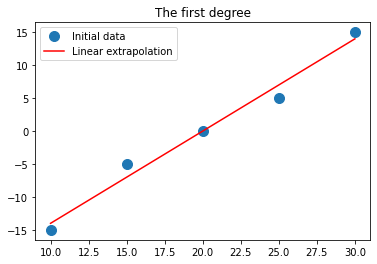

Polynomial of the second degree:
[-98.93210924 -85.82572002 -80.11948066 -66.82873407 -56.76340218
 -45.7318739  -38.00014561 -18.84799757 -14.60032455   0.50014821]
[2452.9278513  1463.65622896  720.38270067  232.35487305  -14.44355146
  -16.27544702  228.71389694  726.09929028 1460.7666581  2453.8876863 ]


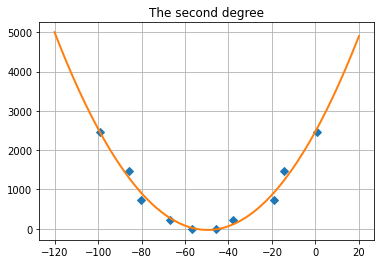

Polynomial of the third degree:
[-98.93210924 -85.82572002 -80.11948066 -66.82873407 -56.76340218
 -45.7318739  -38.00014561 -18.84799757 -14.60032455   0.50014821]
[2452.9278513  1463.65622896  720.38270067  232.35487305  -14.44355146
  -16.27544702  228.71389694  726.09929028 1460.7666581  2453.8876863 ]


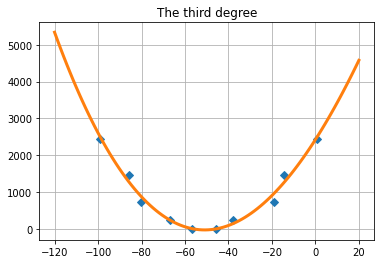

In [1]:
# № 1

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

print("Polynomial of the first degree:")
x1 = np.array([10, 15, 20, 25, 30])
y1 = np.array([-15, -5, 0, 5, 15])
# y = a * p = m * x + c
a1 = np.vstack([x1, np.ones(len(x1))]).T
print(a1)
m1, c1 = np.linalg.lstsq(a1, y1, rcond = None)[0]
print(m1, c1)
plt.plot(x1, y1, 'o', label='Initial data', markersize=10)
plt.plot(x1, m1 * x1 + c1, 'r', label='Linear extrapolation')
plt.legend()
plt.title('The first degree')
plt.show(close=None, block=None)

print("Polynomial of the second degree:")
delta = 10.0
x2 = linspace(-50, 50, 10)
y2 = x2 ** 2 + delta * (rand(10) - 5.5)
x2 += delta * (rand(10) - 5.5)
x2.tofile('E:/ForQuickAccess/x_data.txt', '\n')
y2.tofile('E:/ForQuickAccess/y_data.txt', '\n')
x2 = fromfile('E:/ForQuickAccess/x_data.txt', float, sep='\n')
y2 = fromfile('E:/ForQuickAccess/y_data.txt', float, sep='\n')
print(x2)
print(y2)
# y = a * x ^ 2 + b * x + c
m2 = vstack((x2 ** 2, x2, ones(10))).T
s2 = np.linalg.lstsq(m2, y2, rcond = None)[0]
x_prec2 = linspace(-120, 20, 200)
plt.plot(x2, y2, 'D')
plt.plot(x_prec2, s2[0] * x_prec2 ** 2 + s2[1] * x_prec2 + s2[2], '-', lw=2)
plt.grid()
plt.title('The second degree')
plt.show()

print("Polynomial of the third degree:")
x3 = x2
y3 = y2
print(x3)
print(y3)
# y = a * x ^ 3 + b * x ^ 2 + c * x + d
m3 = vstack((x3 ** 3, x3 ** 2, x3, ones(10))).T
s3 = np.linalg.lstsq(m3, y3, rcond = None)[0]
x_prec3 = linspace(-120, 20, 100)
plt.plot(x3, y3, 'D')
plt.plot(x_prec3, s3[0] * x_prec3 ** 3 + s3[1] * x_prec3 ** 2 + s3[2] * x_prec3 + s3[3], '-', lw=3)
plt.grid()
plt.title('The third degree')
plt.show()

f(x, b) = b0 + b1 * exp(-b2 * x ^ 2)
Coefficients of the function:
[1.24868019 1.46066207 1.39330601]
Linear deviation:
0.002629598285373436
Quadratic deviation:
0.08237065930928003


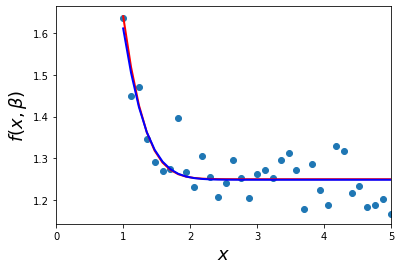

f(x, b) = b0 + b1 * x
Coefficients of the function:
[1.2320193  1.75253719]
Linear deviation:
0.0003284519656893138
Quadratic deviation:
0.07225943386353366


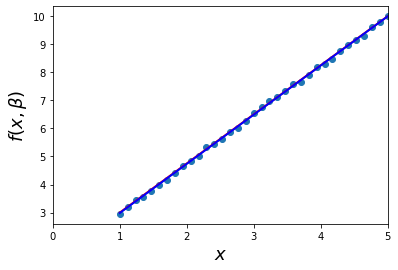

f(x, b) = b0 + b1 * x + b2 * x ^ 2
Coefficients of the function:
[1.34271736 1.6933889  1.50830811]
Linear deviation:
0.0008774473636850135
Quadratic deviation:
0.05584400630739003


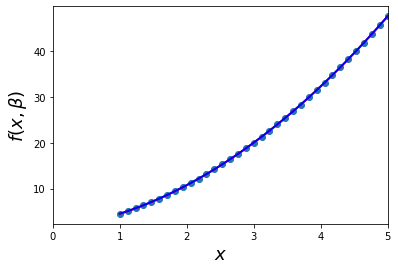

f(x, b) = b0 + b1 * ln(x)
Coefficients of the function:
[1.25403647 1.73980129]
Linear deviation:
8.07004530838015e-05
Quadratic deviation:
0.09069717126996309


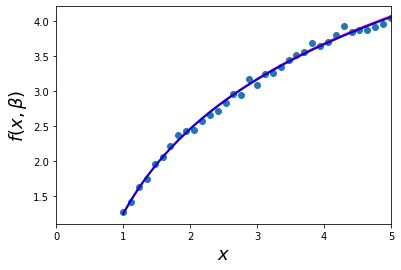

f(x, b) = b0 * x ^ b1
Coefficients of the function:
[1.24770958 1.75021786]
Linear deviation:
1.4958702754784061e-05
Quadratic deviation:
0.0742752395830037


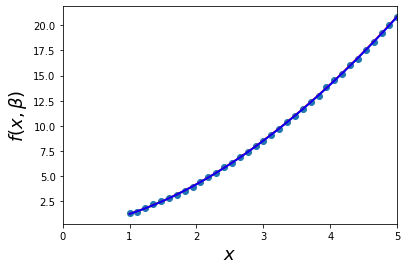

In [4]:
# № 2

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

print("f(x, b) = b0 + b1 * exp(-b2 * x ^ 2)")
beta1 = (1.25, 1.75, 1.5)

def function1(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata1 = np.linspace(1, 5, 35)
y1 = function1(xdata1, *beta1)
ydata1 = y1 + 0.05 * np.random.randn(len(xdata1))
beta_opt1, beta_cov1 = sp.optimize.curve_fit(function1, xdata1, ydata1)
print("Coefficients of the function:")
print(beta_opt1)
lin_dev1 = sum(beta_cov1[0])
print("Linear deviation:")
print(lin_dev1)
residuals1 = ydata1 - function1(xdata1, *beta_opt1)
fres1 = sum(residuals1 ** 2)
print("Quadratic deviation:")
print(fres1)
fig1, ax1 = plt.subplots()
ax1.scatter(xdata1, ydata1)
ax1.plot(xdata1, y1, 'r', lw = 2)
ax1.plot(xdata1, function1(xdata1, *beta_opt1), 'b', lw = 2)
ax1.set_xlim(0, 5)
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print("f(x, b) = b0 + b1 * x")
beta2 = (1.25, 1.75)

def function2(x, b0, b1):
    return b0 + b1 * x

xdata2 = np.linspace(1, 5, 35)
y2 = function2(xdata2, *beta2)
ydata2 = y2 + 0.05 * np.random.randn(len(xdata2))
beta_opt2, beta_cov2 = sp.optimize.curve_fit(function2, xdata2, ydata2)
print("Coefficients of the function:")
print(beta_opt2)
lin_dev2 = sum(beta_cov2[0])
print("Linear deviation:")
print(lin_dev2)
residuals2 = ydata2 - function2(xdata2, *beta_opt2)
fres2 = sum(residuals2 ** 2)
print("Quadratic deviation:")
print(fres2)
fig2, ax2 = plt.subplots()
ax2.scatter(xdata2, ydata2)
ax2.plot(xdata2, y2, 'r', lw = 2)
ax2.plot(xdata2, function2(xdata2, *beta_opt2), 'b', lw = 2)
ax2.set_xlim(0, 5)
ax2.set_xlabel(r"$x$", fontsize=18)
ax2.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print("f(x, b) = b0 + b1 * x + b2 * x ^ 2")
beta3 = (1.25, 1.75, 1.5)

def function3(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata3 = np.linspace(1, 5, 35)
y3 = function3(xdata3, *beta3)
ydata3 = y3 + 0.05 * np.random.randn(len(xdata3))
beta_opt3, beta_cov3 = sp.optimize.curve_fit(function3, xdata3, ydata3)
print("Coefficients of the function:")
print(beta_opt3)
lin_dev3 = sum(beta_cov3[0])
print("Linear deviation:")
print(lin_dev3)
residuals3 = ydata3 - function3(xdata3, *beta_opt3)
fres3 = sum(residuals3 ** 2)
print("Quadratic deviation:")
print(fres3)
fig3, ax3 = plt.subplots()
ax3.scatter(xdata3, ydata3)
ax3.plot(xdata3, y3, 'r', lw = 2)
ax3.plot(xdata3, function3(xdata3, *beta_opt3), 'b', lw = 2)
ax3.set_xlim(0, 5)
ax3.set_xlabel(r"$x$", fontsize=18)
ax3.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print("f(x, b) = b0 + b1 * ln(x)")
beta4 = (1.25, 1.75)

def function4(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata4 = np.linspace(1, 5, 35)
y4 = function4(xdata4, *beta4)
ydata4 = y4 + 0.05 * np.random.randn(len(xdata4))
beta_opt4, beta_cov4 = sp.optimize.curve_fit(function4, xdata4, ydata4)
print("Coefficients of the function:")
print(beta_opt4)
lin_dev4 = sum(beta_cov4[0])
print("Linear deviation:")
print(lin_dev4)
residuals4 = ydata4 - function4(xdata4, *beta_opt4)
fres4 = sum(residuals4 ** 2)
print("Quadratic deviation:")
print(fres4)
fig4, ax4 = plt.subplots()
ax4.scatter(xdata4, ydata4)
ax4.plot(xdata4, y4, 'r', lw = 2)
ax4.plot(xdata4, function4(xdata4, *beta_opt4), 'b', lw = 2)
ax4.set_xlim(0, 5)
ax4.set_xlabel(r"$x$", fontsize=18)
ax4.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print("f(x, b) = b0 * x ^ b1")
beta5 = (1.25, 1.75)

def function5(x, b0, b1):
    return b0 * x ** b1

xdata5 = np.linspace(1, 5, 35)
y5 = function5(xdata5, *beta5)
ydata5 = y5 + 0.05 * np.random.randn(len(xdata5))
beta_opt5, beta_cov5 = sp.optimize.curve_fit(function5, xdata5, ydata5)
print("Coefficients of the function:")
print(beta_opt5)
lin_dev5 = sum(beta_cov5[0])
print("Linear deviation:")
print(lin_dev5)
residuals5 = ydata5 - function5(xdata5, *beta_opt5)
fres5 = sum(residuals5 ** 2)
print("Quadratic deviation:")
print(fres5)
fig5, ax5 = plt.subplots()
ax5.scatter(xdata5, ydata5)
ax5.plot(xdata5, y5, 'r', lw = 2)
ax5.plot(xdata5, function5(xdata5, *beta_opt5), 'b', lw = 2)
ax5.set_xlim(0, 5)
ax5.set_xlabel(r"$x$", fontsize=18)
ax5.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Dependence of wages on work experience

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


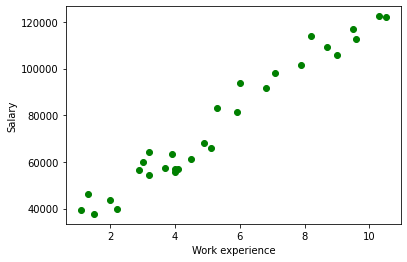

Regression line coefficients

26780.09915062818
[9312.57512673]

Forecast

     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


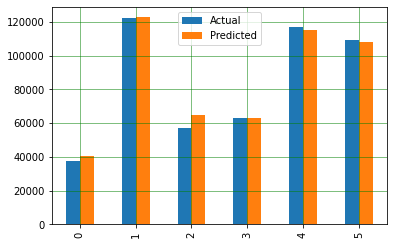

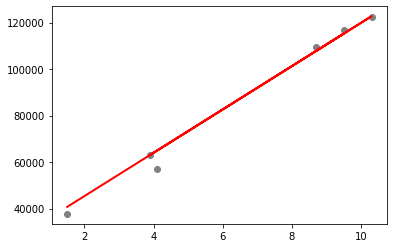

In [18]:
# № 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
print("Dependence of wages on work experience")
print()
print(dataframe.describe())
plt.scatter(dataframe['YearsExperience'], dataframe['Salary'], color = 'g', label = "Salary")
plt.xlabel("Work experience")
plt.ylabel("Salary")
plt.show()
x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Regression line coefficients")
print()
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print()
print("Forecast")
print()
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

Data on the quality of red wine

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012

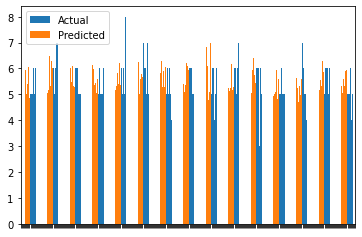

Mean squared error

0.3844711978201246


In [5]:
# № 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
dataframe = pd.read_csv(url)
print("Data on the quality of red wine")
print()
print(dataframe.describe())
x = dataframe[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
              'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dataframe['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
print()
print("Multiple regression coefficients")
print()
print(coeff_df)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print()
print("Forecast")
print()
print(df)
df.plot(kind='bar')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()
print("Mean squared error")
print()
print(metrics.mean_squared_error(y_test, y_pred))

[[3.  1. ]
 [3.2 1. ]
 [3.4 1. ]
 [3.6 1. ]
 [3.8 1. ]
 [4.  1. ]]
-1.2857142857142865 8.666666666666668


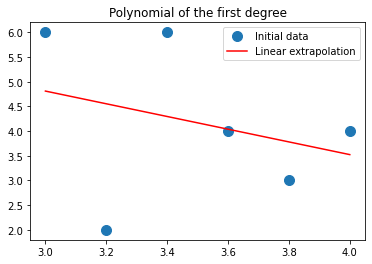

[3.  3.2 3.4 3.6 3.8 4. ]
[6. 2. 6. 4. 3. 4.]
2.2321428571426667 -16.910714285713148 35.74999999999842


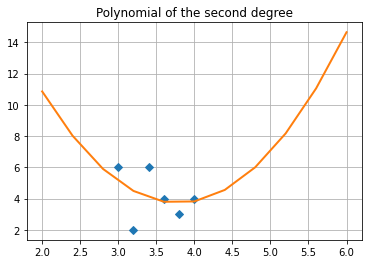

In [36]:
# № 5
# 4 вариант

import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([6.0, 2.0, 6.0, 4.0, 3.0, 4.0])
a = np.vstack([x, np.ones(len(x))]).T
print(a)
m, c = np.linalg.lstsq(a, y, rcond = None)[0]
print(m, c)
plt.plot(x, y, 'o', label='Initial data', markersize=10)
plt.plot(x, m * x + c, 'r', label='Linear extrapolation')
plt.legend()
plt.title('Polynomial of the first degree')
plt.show()

print(x)
print(y)
n = vstack((x ** 2, x, ones(6))).T
s = np.linalg.lstsq(n, y, rcond = None)[0]
print(s[0], s[1], s[2])
x_prec = linspace(2, 6, 11)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.title('Polynomial of the second degree')
plt.show()